<a href="https://colab.research.google.com/github/nadiya-k-a/Tcs---internship/blob/main/most_used_drug_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Reading the data frame
df = pd.read_csv('/content/drive/MyDrive/data2.csv')

In [ ]:
##checking most common drugs used
df['drugName'].value_counts()

Levonorgestrel                       9187
Etonogestrel                         8192
Ethinyl estradiol / norethindrone    6915
Nexplanon                            5374
Ethinyl estradiol / norgestimate     5150
                                     ... 
Polocaine                               1
Cubicin                                 1
Demadex                                 1
Imiglucerase                            1
Grifulvin V                             1
Name: drugName, Length: 3671, dtype: int64

### Levonorgestrel is the most used drug

In [ ]:
df.shape

(399819, 11)

In [ ]:
df.head()

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
0,163740,Glenn Smith,Male,80,Hispanic,Mirtazapine,Depression,10,28-Feb-12,22,Mild Side Effects
1,206473,Gregory Lopez,Male,63,African,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17,Severe Side Effects
2,159672,Alicia Weiss,Female,80,Asian,Bactrim,Urinary Tract Infection,9,29-Sep-17,3,Severe Side Effects
3,39293,Aaron Smith,Male,20,Hispanic,Contrave,Weight Loss,9,5-Mar-17,35,Extremely Severe Side Effects
4,97768,Jenna Morrison,Female,46,Hispanic,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4,Mild Side Effects


In [ ]:
##Creating  a data frame for the drug Levonorgestrel
df1 = df[df['drugName']=='Levonorgestrel' ]

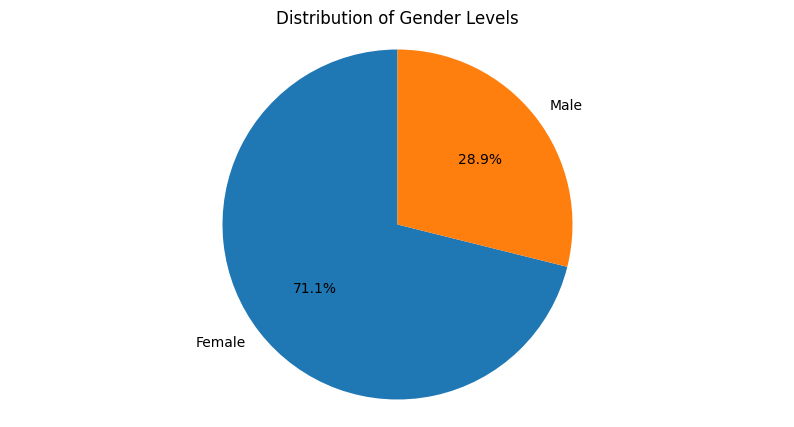

In [ ]:
##distribution of  gender levels for the drug
gen_count=df1['Gender'].value_counts()
gen_count

fig,ax=plt.subplots(figsize=(10,5))
ax.pie(gen_count,labels=gen_count.index,autopct='%1.1f%%',startangle=90)
ax.set_title("Distribution of Gender Levels")
ax.axis("equal")
plt.show()

In [ ]:
df1.head()

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
42,130301,Taylor Jackson,Female,66,African,Levonorgestrel,Emergency Contraception,10,28-Dec-13,20,Severe Side Effects
82,167387,Jennifer Berg,Male,34,Hispanic,Levonorgestrel,Emergency Contraception,10,20-Mar-16,14,Extremely Severe Side Effects
92,129438,Robert Dawson,Male,76,African,Levonorgestrel,Birth Control,10,26-Aug-15,1,Severe Side Effects
99,128928,Nicholas Gonzales,Female,67,African,Levonorgestrel,Birth Control,10,12-Dec-15,0,Severe Side Effects
103,129850,Kevin Obrien,Female,19,Asian,Levonorgestrel,Emergency Contraception,8,27-Apr-15,9,Moderate Side Effects


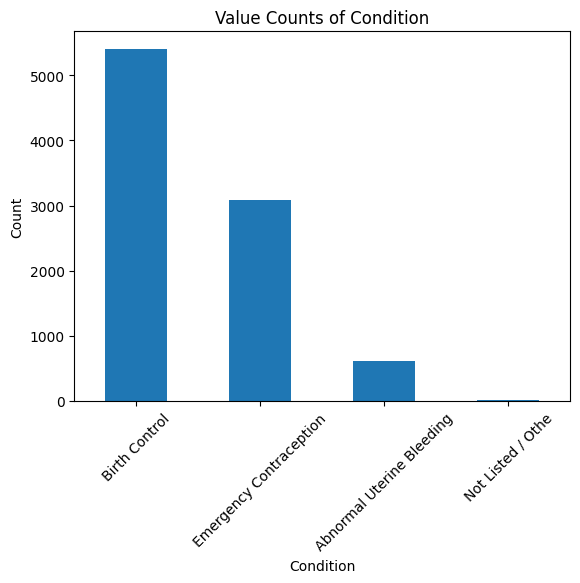

In [ ]:

df1['condition'].value_counts().plot(kind='bar')

plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Value Counts of Condition')
plt.xticks(rotation=45)

plt.show()

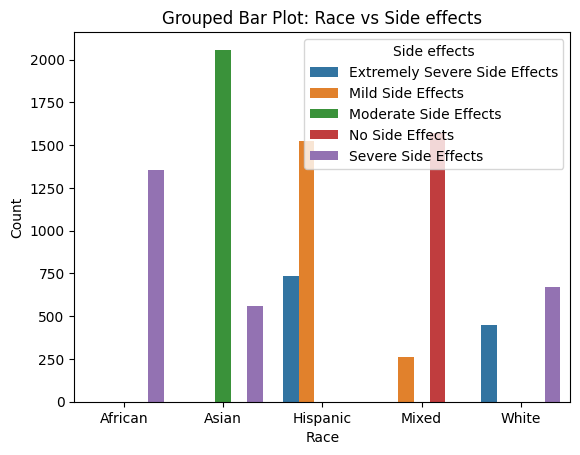

In [ ]:
##Race vs Side effects

# Group the data by "Race" and "Side effects" and calculate the count
grouped_data = df1.groupby(['Race', 'Side effects']).size().unstack()

# Reset index to convert 'Race' to a column
grouped_data = grouped_data.reset_index()

# Melt the DataFrame to convert 'Side effects' to a column
melted_data = pd.melt(grouped_data, id_vars='Race', var_name='Side effects', value_name='Count')

# Plot the grouped bar plot using seaborn
sns.barplot(x='Race', y='Count', hue='Side effects', data=melted_data)

plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Grouped Bar Plot: Race vs Side effects')

plt.show()

it can be seen from this plot that this drug has severe side effects in Africans. It is affecting hisapnic and white races at extreme levels.

In [ ]:
df2 =df1.copy()

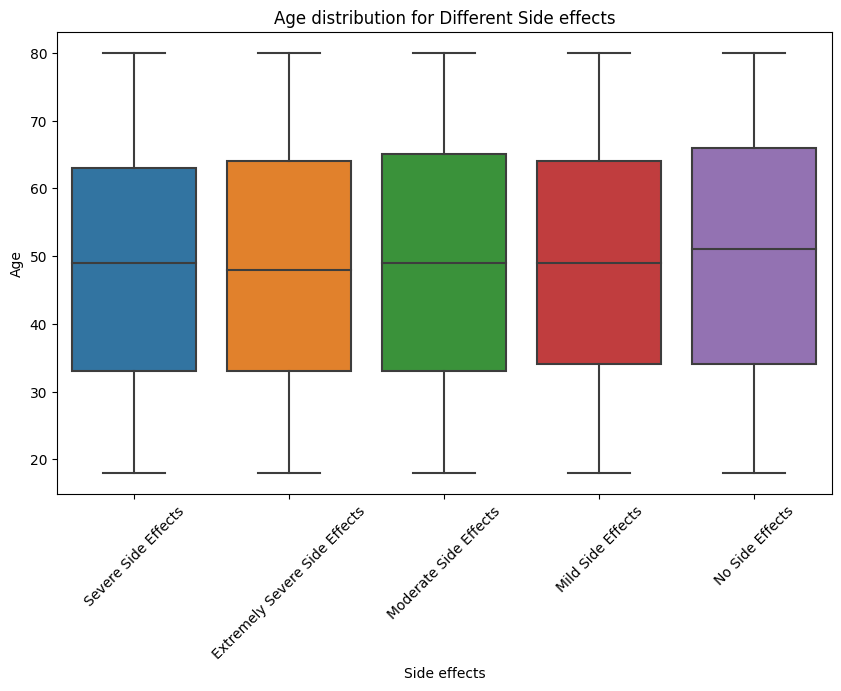

In [ ]:
plt.figure(figsize =(10,6))
sns.boxplot(x= 'Side effects', y ='Age',data = df1)
plt.title('Age distribution for Different Side effects')
plt.xlabel('Side effects')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

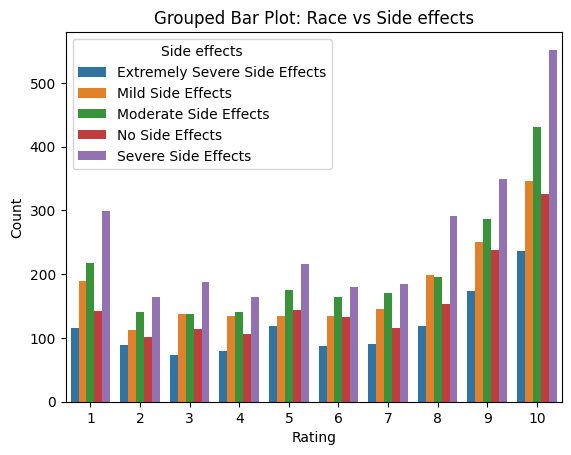

In [ ]:
grouped_data = df1.groupby(['rating', 'Side effects']).size().unstack()

# Reset index to convert 'Race' to a column
grouped_data = grouped_data.reset_index()

# Melt the DataFrame to convert 'Side effects' to a column
melted_data = pd.melt(grouped_data, id_vars='rating', var_name='Side effects', value_name='Count')

# Plot the grouped bar plot using seaborn
sns.barplot(x='rating', y='Count', hue='Side effects', data=melted_data)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Grouped Bar Plot: Race vs Side effects')

plt.show()

In [ ]:
## Dividing age column
df1['Age'] = pd.cut(df1['Age'],bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])

<ipython-input-15-8a3cde47054d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = pd.cut(df1['Age'],bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])


Text(0.5, 1.0, 'rating vs Age')

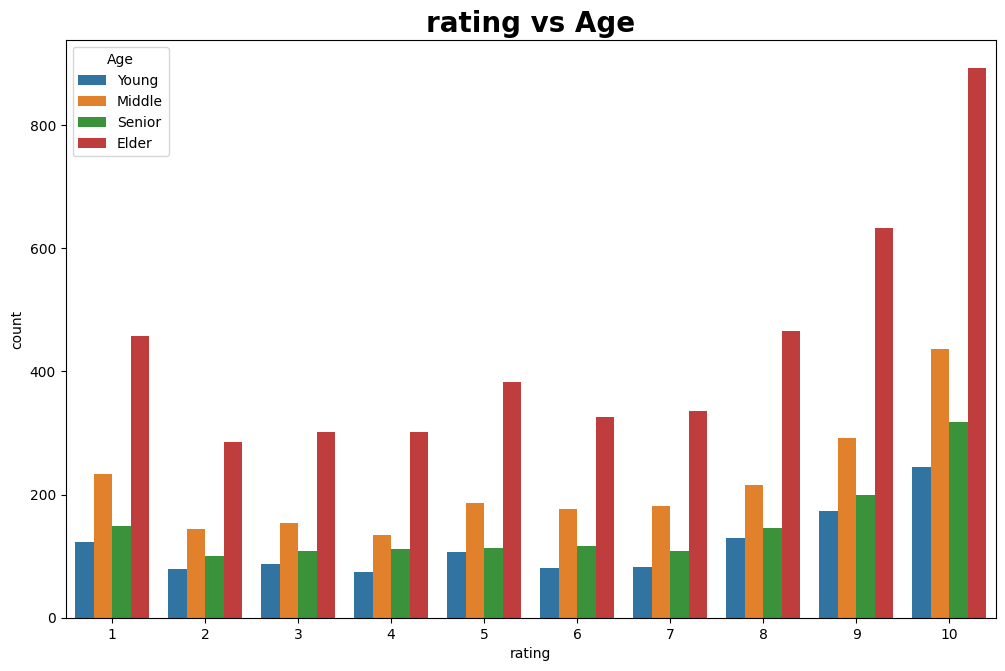

In [ ]:
plt.figure(figsize=(12, 7.5))
sns.countplot(x='rating',hue='Age', data=df1,)
plt.title("rating vs Age",fontweight="bold", size=20)

<ipython-input-17-c78459d25360>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_data = df2.corr()  # Calculate the correlation matrix


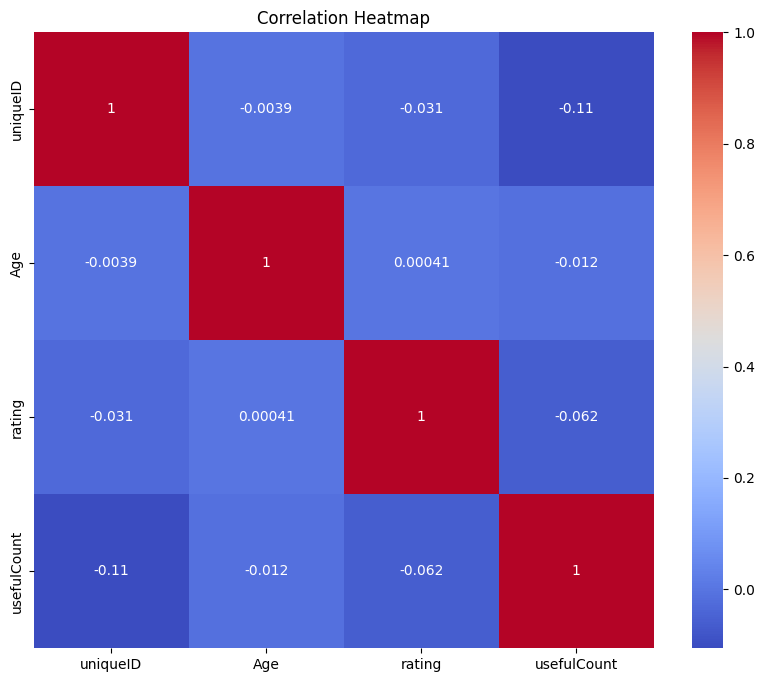

In [ ]:
heatmap_data = df2.corr()  # Calculate the correlation matrix

plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')  # Create the heatmap with annotations and color map
plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()


# Preprocessing



## Nullvalue Handling

In [ ]:
# identifying null values
df1.isna().mean()*100

uniqueID        0.000000
Name            0.000000
Gender          0.000000
Age             0.000000
Race            0.000000
drugName        0.000000
condition       0.751061
rating          0.000000
date            0.000000
usefulCount     0.000000
Side effects    0.000000
dtype: float64

In [ ]:
## creating Dataframe for null values analysis
rating_null = df1[df1['condition'].isna()]
rating_null

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
156,165767,Vickie Li,Female,Elder,Hispanic,Levonorgestrel,NaN,7,3-Apr-17,0,Mild Side Effects
2299,131150,Alexa White,Female,Young,Asian,Levonorgestrel,NaN,10,12-Dec-08,8,Moderate Side Effects
15984,130734,Anthony Miller,Female,Middle,Hispanic,Levonorgestrel,NaN,8,17-Sep-11,0,Extremely Severe Side Effects
31084,130610,Vincent Bennett,Female,Elder,African,Levonorgestrel,NaN,5,1-Aug-12,0,Severe Side Effects
40860,130839,Stephanie Ramos,Female,Young,Hispanic,Levonorgestrel,NaN,6,1-Aug-11,0,Mild Side Effects
...,...,...,...,...,...,...,...,...,...,...,...
370684,130403,Michael Erickson,Female,Middle,Asian,Levonorgestrel,NaN,4,10-Jun-13,26,Moderate Side Effects
389507,128984,Jason Williams,Male,Elder,African,Levonorgestrel,NaN,7,4-Dec-15,42,Severe Side Effects
394681,130616,Janet Doyle,Female,Young,Mixed,Levonorgestrel,NaN,7,17-Jul-12,12,Mild Side Effects
394967,167032,Christian Davis,Male,Middle,Asian,Levonorgestrel,NaN,9,15-Jun-16,7,Moderate Side Effects


In [ ]:
## Filling the condition column in accordance with these three column
cols = ['Gender', 'Age', 'Race']  # List of columns to be considered

In [ ]:

# Apply the transformation to each column in the list
for col in cols:
    df2['condition'] = df2.groupby(col)['condition'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

In [ ]:

df2.isna().sum()

uniqueID        0
Name            0
Gender          0
Age             0
Race            0
drugName        0
condition       0
rating          0
date            0
usefulCount     0
Side effects    0
dtype: int64

## Outlier Detection

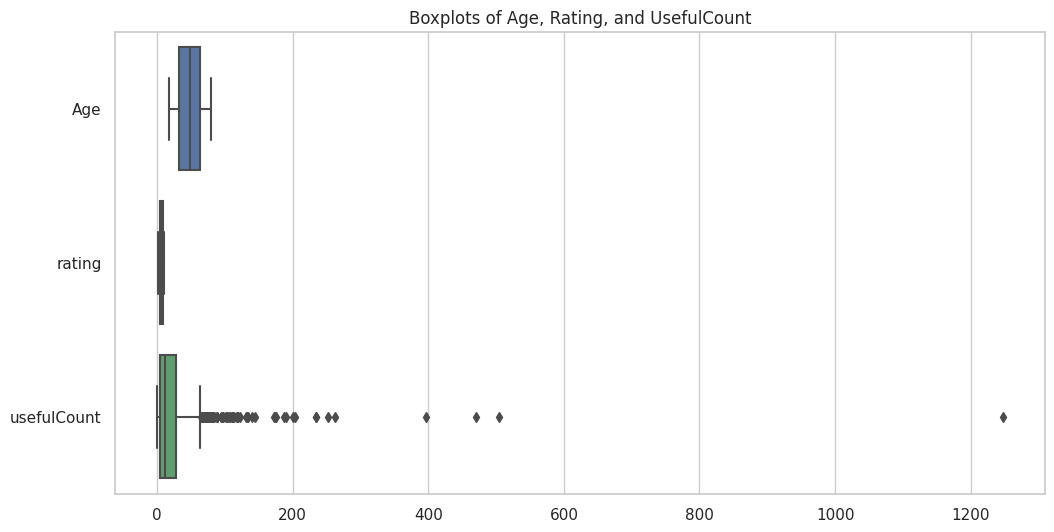

In [ ]:

sns.set(style="whitegrid")

# Create boxplots for 'Age', 'Rating', and 'UsefulCount' columns
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.boxplot(data=df2[['Age', 'rating', 'usefulCount']], orient="h")  # Create the boxplots for specified columns
plt.title('Boxplots of Age, Rating, and UsefulCount')  # Set the title of the plot
plt.show()

### IQR method for outlier calculation

In [ ]:
Q1 = df2[ 'usefulCount'].quantile(0.25)
Q3 = df2[ 'usefulCount'].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
# Determine lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


In [ ]:
# Identify the  outliers
outliers_usefulCount = df2[(df2['usefulCount'] < lower_bound) | (df2['usefulCount'] > upper_bound)]



In [ ]:
df2['usefulCount'] = df2['usefulCount'].mask((df2['usefulCount'] < lower_bound) | (df2['usefulCount'] > upper_bound), df2['usefulCount'].median())

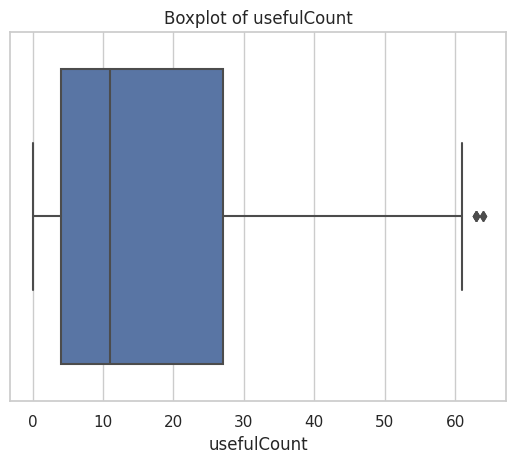

In [ ]:
##boxplot after handling the ourliers
# Handling outliers by replacing with the median
sns.boxplot(x=df2['usefulCount'])

# Set the title and labels
plt.title('Boxplot of usefulCount')
plt.xlabel('usefulCount')
plt.show()

In [ ]:
df2.isna().sum()

uniqueID        0
Name            0
Gender          0
Age             0
Race            0
drugName        0
condition       0
rating          0
date            0
usefulCount     0
Side effects    0
dtype: int64

# ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the "Race" and "Gender" columns
df2['Race'] = label_encoder.fit_transform(df2['Race'])
df2['Gender'] = label_encoder.fit_transform(df2['Gender'])

# Verify the updated dataframe with label encoded columns
print(df2.head())

     uniqueID               Name  Gender  Age  Race        drugName  \
42     130301     Taylor Jackson       0   66     0  Levonorgestrel   
82     167387      Jennifer Berg       1   34     2  Levonorgestrel   
92     129438      Robert Dawson       1   76     0  Levonorgestrel   
99     128928  Nicholas Gonzales       0   67     0  Levonorgestrel   
103    129850       Kevin Obrien       0   19     1  Levonorgestrel   

                   condition  rating       date  usefulCount  \
42   Emergency Contraception      10  28-Dec-13           20   
82   Emergency Contraception      10  20-Mar-16           14   
92             Birth Control      10  26-Aug-15            1   
99             Birth Control      10  12-Dec-15            0   
103  Emergency Contraception       8  27-Apr-15            9   

                      Side effects  
42             Severe Side Effects  
82   Extremely Severe Side Effects  
92             Severe Side Effects  
99             Severe Side Effects  
103

In [ ]:
##encoding side effects column using mapping values

side_effect_mapping = {'No Side Effects':0,
    'Mild Side Effects': 1,
    'Moderate Side Effects': 2,'Severe Side Effects':3,
    'Extremely Severe Side Effects':4
                      }

df2['Side effects'] = df2['Side effects'].map(side_effect_mapping)

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
## target encoding columns drugname and condition
import category_encoders as ce

columns_to_encode = ['condition']

encoder = ce.TargetEncoder()



In [ ]:
df3 = pd.concat([df2.drop(columns_to_encode, axis=1), encoder.fit_transform(df2[columns_to_encode], df2['Side effects'])], axis=1)


In [ ]:
df3.head()

,uniqueID,Name,Gender,Age,Race,drugName,rating,date,usefulCount,Side effects,condition
42,130301,Taylor Jackson,0,66,0,Levonorgestrel,10,28-Dec-13,20,3,2.024603
82,167387,Jennifer Berg,1,34,2,Levonorgestrel,10,20-Mar-16,14,4,2.024603
92,129438,Robert Dawson,1,76,0,Levonorgestrel,10,26-Aug-15,1,3,1.993604
99,128928,Nicholas Gonzales,0,67,0,Levonorgestrel,10,12-Dec-15,0,3,1.993604
103,129850,Kevin Obrien,0,19,1,Levonorgestrel,8,27-Apr-15,9,2,2.024603


In [ ]:
df3.isna().sum()

uniqueID        0
Name            0
Gender          0
Age             0
Race            0
drugName        0
rating          0
date            0
usefulCount     0
Side effects    0
condition       0
dtype: int64

# FEATURE REDUCTION

In [ ]:
  df3.drop(['uniqueID','Name','date','drugName'],axis = 1,inplace=True)

# FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler




columns_to_scale = ['Age', 'rating','usefulCount']
scaler = MinMaxScaler()

# Perform min-max scaling on the specified columns
df3[columns_to_scale] = scaler.fit_transform(df3[columns_to_scale])


In [ ]:
##Scaled data
df3.head()

,Gender,Age,Race,rating,usefulCount,Side effects,condition
42,0,0.774194,0,1.000000,0.312500,3,2.024603
82,1,0.258065,2,1.000000,0.218750,4,2.024603
92,1,0.935484,0,1.000000,0.015625,3,1.993604
99,0,0.790323,0,1.000000,0.000000,3,1.993604
103,0,0.016129,1,0.777778,0.140625,2,2.024603


# MODEL TRAINING

In [ ]:
x= df3.drop('Side effects',axis=1)
y= df3['Side effects']

In [ ]:
##SPLITTING THE DATA FRAME INTO TEST AND TRAIN DATA SET
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.2)

In [ ]:
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'  trained')

RandomForestClassifier  trained
LogisticRegression  trained
KNeighborsClassifier  trained


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained
XGBClassifier  trained


In [ ]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred,average = 'macro'))
    model_test_f1_score.append(f1_score(y_test,y_pred,average = 'macro'))
    model_test_precision_score.append(precision_score(y_test,y_pred,average = 'macro'))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix3={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6],
                 }
confusion_matrix3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Random Forest': array([[316,  11,   0,   0,   0],
        [ 65, 239,   0,   0,  50],
        [  0,   0, 362,  36,   0],
        [  0,   0, 109, 381,  38],
        [  0, 119,   0,  57,  55]]),
 'Logistic regression': array([[327,   0,   0,   0,   0],
        [ 65,  26,   0, 263,   0],
        [  0,   0,   0, 398,   0],
        [135,   0, 273, 120,   0],
        [ 91,  17,   0, 123,   0]]),
 'KNN': array([[320,   7,   0,   0,   0],
        [ 64, 232,   0,   0,  58],
        [  0,   0, 371,  27,   0],
        [  0,   0, 103, 377,  48],
        [  0, 114,   0,  62,  55]]),
 'DecisionTree': array([[278,  49,   0,   0,   0],
        [ 58, 198,   0,   0,  98],
        [  0,   0, 299,  99,   0],
        [  0,   0,  91, 376,  61],
        [  0,  89,   0,  52,  90]]),
 'BernolliNB': array([[  0,   0, 327,   0,   0],
        [  0,   0, 354,   0,   0],
        [  0,   0, 398,   0,   0],
        [  0,   0, 253, 275,   0],
        [  0,   0, 231,   0,   0]]),
 'GaussianNB': array([[327,   0,   0, 

In [ ]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.736126,0.688306,0.702147,0.686817
1,Logistic regression,0.257345,0.198129,0.260144,0.253304
2,KNN,0.737214,0.689303,0.703646,0.684777
3,DecisionTree,0.675190,0.651841,0.652493,0.651650
4,BernolliNB,0.366159,0.218169,0.304167,0.250928
5,GaussianNB,0.750816,0.720372,0.746231,0.736363
6,XGBClassifier,0.733406,0.681551,0.697380,0.677429


### Here GaussianNB is the best performing model